<a href="https://colab.research.google.com/github/aquaxmiriel/worksheet0/blob/main/(4)2408239_NikishaShrestha4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Problem1
#1.Load the Dataset:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read the dataset into a pandas DataFrame.
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/diabetes.csv")

# checking first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# checking for missing values
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/diabetes.csv")
missing_info = (df.isnull().sum()/len(df)) * 100
print(missing_info)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [ ]:
# summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#3.Feature Engineering
#Separate the feature matrix (X) and target variable (y).
x = df.drop('Outcome', axis=1)
y = df['Outcome']
print("Feature matrix (x): ")
print(x.head())

print("\nTarget vector (y): ")
print(y.head())

Feature matrix (x): 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Target vector (y): 
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
#Perform a train - test split from scratch using a 70% − 30% ratio.

# define a function for train-test split from scratch
def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
  """
  Splits dataset into train and test sets.
  Arguments:
  x: np.ndarray
    Feature matrix.
  y: np.ndarray
    Target vector.
  test_size: float
    Proportion of the dataset to include in the test split (0 < test_size <1)
  random_seed: int
    Random seed for reproducibility.
  Returns:
  x_train: np.ndarray
    Training feature matrix.
  x_test: np.ndarray
    Testing feature matrix.
  y_train: np.ndarray
    Training target vector.
  y_test: np.ndarray
    Testing target vector.
  """
  np.random.seed(random_seed)
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices) #shuffle the indices
  test_split_size = int(len(x) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  x_train = x[train_indices]
  x_test = x[test_indices]
  y_train = y[train_indices]
  y_test = y[test_indices]
  return x_train, x_test, y_train, y_test
# convert dataframe to numpy arrays
x = x.to_numpy()
y = y.to_numpy()
# perform the train-test split
x_train, x_test, y_train, y_test = train_test_split_scratch(x, y, test_size=0.3)
# output shapes to verify
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (538, 8)
Shape of x_test:  (230, 8)
Shape of y_train:  (538,)
Shape of y_test:  (230,)


In [ ]:
import numpy as np
#4.Implement KNN
#Compute distances using Euclidean distance.
def euclidean_distance(point1, point2):
  """
  Calculate the euclidean distance between two points in n-dimensional space
  Arguments:
  point1: np.ndarray
    First point as a numpy array
  point2: np.ndarray
    Second point as a numpy array
  Returns: float
    Euclidean distance between the two points.
  Raises:
  ValueError: If the two points have different dimensions.
  """
  # check if the points are of the same dimension
  if point1.shape != point2.shape:
    raise ValueError("The two points must have the same dimension")
  # calculate the euclidean distance
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

# test case for the function
try:
  # define two points
  point1 = np.array([3,4])
  point2 = np.array([0,0])
  # calculate the euclidean distance
  distance = euclidean_distance(point1, point2)
  # check if the result matched the expected value (e.g., sqrt(3^2 + 4^2) = 5)
  expected_result = 5.0
  assert np.isclose(distance, expected_result), f"Expected {expected_result}, but got {distance}"
  print("Test passed successfully!")
except ValueError as ve:
  print(f"ValueError: {ve}")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occured: {e}")

Test passed successfully!


In [ ]:
#Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

# function for KNN prediction for a single query
def knn_predict_single(query, x_train, y_train, k=3):
  """
  Predicts the label for a single query using the KNN algorithm.
  Arguments:
  query: np.ndarray
    The query point for which the prediction is to be made.
  x_train: np.ndarray
    The feature matrix of the training data.
  y_train: np.ndarray
    The target vector of the training data.
  k: int
    The number of nearest neighbors to consider for prediction.
  Returns: int
    The predicted label for the query point.
  """
  distances = [euclidean_distance(query, x) for x in x_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

# test cases for KNN
try:
  # define the query for testing (use one row of the test set, e.g., the first row)
  query = x_test[0] #selecting the first test sample as teh query
  true_label = y_test[0] #orresponding true label for the query

  # predict the label for the single quey using knn_predict_single
  prediction = knn_predict_single(query, x_train, y_train, k=3)

  # print test results
  print("Prediction: ", prediction)
  print("Actual: ", true_label)
  print("Test passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occured: {e}")

Prediction:  0
Actual:  0
Test passed successfully!


In [ ]:
# function to test KNN for all test samples
def knn_predict_all(x_test, x_train, y_train, k=3):
  """
  Predicts the labels for all test samples using the KNN algorithm.
  Arguments:
  x_test: np.ndarray
    The feature matrix of the test data.
  x_train: np.ndarray
    The feature matrix of the training data.
  y_train: np.ndarray
    The target vector of the training data.
  k: int, optional
    The number of nearest neighbors to consider for prediction.
  Returns: np.ndarray
    The predicted labels for all test samples.
  """
  predictions = [knn_predict_single(x, x_train, y_train, k) for x in x_test]
  return np.array(predictions)

# test cases for KNN
try:
  # predict the labels for the entire test set
  predictions = knn_predict_all(x_test, x_train, y_train, k=3)
  # print test results
  print("Prediction: ", predictions)
  print("Actual: ", y_test)
  # check if predictions match expected format
  assert predictions.shape == y_test.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occured: {e}")

Prediction:  [0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0]
Actual:  [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0]
Test passed successfully!


In [ ]:
#Evaluate the performance using accuracy.
#function to compute accyracy of predictions
def compute_accuracy(y_true, y_pred):
  """
  Computer the accuracy of predictions.
  Arguments:
  y_true: ndarray ; the true labels
  y_pred: np.darray; the predicted labels
  Returns:
  float: the accuracy as a percentage (0 to 100)
  """
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

#perform prediction on the entire test set
try:
  # make predictions on the entire test set
  predictions = knn_predict_all(x_test, x_train, y_train, k=3)
  # compute the accuracy
  accuracy = compute_accuracy(y_test, predictions)
  # print the accuracy
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexpected error occured during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 67.39%


In [ ]:
#Problem2 - Experimentation
#1.Repeat the classification task
#scale the feature matrix x
def scale_features(x_train, x_test):
  """
  scale features using Z-score normalization
  Arguments:
  x_train: np.ndarray; training data features
  x_test: np.ndarray; testing data features
  Returns:
  x_train_scaled: np.ndarray; scaled training data
  x_test_scaled: np.ndarray; scaled testing data
  """

  mean = np.mean(x_train, axis=0)
  std = np.std(x_train, axis=0)
  x_train_scaled = (x_train - mean) / std
  x_test_scaled = (x_test - mean) / std
  return x_train_scaled, x_test_scaled

In [ ]:
#use the scaled data for training and testing the kNN classifier

# scale the feature matrix
x_train_scaled, x_test_scaled = scale_features(x_train, x_test)

# perform predictions on scaled data
predictions_scaled = knn_predict_all(x_test_scaled, x_train_scaled, y_train, k=3)

# evaluate accuracy on scaled data
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)

# print results
print(f"Accuracy on scaled data: {accuracy_scaled:.2f}%")

Accuracy on scaled data: 70.87%


In [ ]:
#2.Comparative Analysis: Compare the results
#accuracy comparison

# predictions and accuracy on original data
predictions_original = knn_predict_all(x_test, x_train, y_train, k=3)
accuracy_original = compute_accuracy(y_test, predictions_original)
print(f"Accuracy on original data: {accuracy_original:.2f}%")

# scale the feature matrix
x_train_scaled, x_test_scaled = scale_features(x_train, x_test)

# display the scaled data
print("\nScaled training data (x_train_scaled): ")
print(x_train_scaled)

print("\nScaled test data (x_test_scaled): ")
print(x_test_scaled)

# display the actual data (test labels)
print("\nActual test labels (y_test): ")
print(y_test)

predictions_scaled = knn_predict_all(x_test_scaled, x_train_scaled, y_train, k=3)
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)
print(f"Accuracy on scaled data: {accuracy_scaled:.2f}%")

Accuracy on original data: 67.39%

Scaled training data (x_train_scaled): 
[[ 0.39030899 -1.35358735  0.68029019 ...  0.50147657 -0.91694302
   0.16477657]
 [-0.8376807  -0.79690752 -0.5372986  ... -1.06182543 -0.61259898
  -0.94977596]
 [ 0.39030899 -0.48764095  0.12684074 ...  0.64598348 -0.90816386
  -0.4353671 ]
 ...
 [ 1.92529611 -0.61134758  0.90166997 ...  1.78890175  1.95091424
   0.421981  ]
 [-1.14467813  0.6257187  -3.8579953  ...  1.36851802 -0.77355016
  -0.34963229]
 [-1.14467813  0.13089219  1.45511942 ... -1.24574331 -0.60674621
  -1.03551077]]

Scaled test data (x_test_scaled): 
[[ 0.69730642 -0.70412755 -0.64798849 ...  0.26501072 -0.11511354
   0.85065505]
 [-0.53068328 -0.27115435  0.29287557 ...  0.48833958 -0.9403541
  -1.03551077]
 [-0.53068328 -0.39486098 -0.31591882 ... -0.15537301 -0.91109025
  -1.03551077]
 ...
 [ 0.08331157 -0.36393432 -0.31591882 ...  0.37010666  1.27491932
  -0.60683672]
 [-1.14467813  0.1927455   0.5696003  ...  0.56716153  0.97935443
  -

In [ ]:
#perofrmance matrics comparion
import time

# measure execution time for original data
start_original = time.time()
knn_predict_all(x_test, x_train, y_train, k=3)
end_original = time.time()
time_original = end_original - start_original
print(f"Execution time on original data: {time_original:.4f} seconds")

# measure execution time for scaled data
start_scaled = time.time()
knn_predict_all(x_test_scaled, x_train_scaled, y_train, k=3)
end_scaled = time.time()
time_scaled = end_scaled - start_scaled
print(f"Execution time on scaled data: {time_scaled:.4f} second")

Execution time on original data: 1.0490 seconds
Execution time on scaled data: 0.8593 second


#Discuss how scaling impacted the KNN performance

Scaling improves the performance of KNN by ensuring that all features contribute equally to the distance metric, which often results in higher accuracy, better genaralization, and more reliable predictions.

#Discuss the reason for any observed changes in accuracy

Scaling the data leads to a more balanced distance computation by ensuringthat each feature contributes equally to the distance measure. This leads to a more accurate and fair representation of data points in the KNN algorithm. As a result, the accuracy of the model often increases when scaling is applied, especially when the features have different ranges or units. The observed change in accuracy can be directly attributed to the improved balance in the contribution of each feature to the model's decision-making process.

In [ ]:
#Probelm3 - Experimentation with k
#vary the number of k (1 to 15) and record accuracy and time taken for each predictions

#function to test KNN on different values of k and plot the accuracies
def experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values):
  """
  Run KNN predictions for different values of k and plot the accuracies

  Arguments:
  x_train: np.ndarray; the training feature matrix
  y_train: np.ndarray; the training labels
  x_test: np.ndarray; the test feature matrix
  y_test: np.ndarray; the test labels
  k_values: list of int; a list of k values to experiment with

  Returns:
  dict: a dictionary with k values as keys and thier corresponding accuracies and time taken
  """
  accuracies = {}
  times = {}
  for k in k_values:
    # start measuring time
    start_time = time.time()

    # make predictions using the current value of k
    predictions = knn_predict_all(x_test, x_train, y_train, k=k)

    # compute the accuracy
    accuracy = compute_accuracy(y_test, predictions)
    accuracies[k] = accuracy

    # calculate the time taken for the prediction
    end_time = time.time()
    elapsed_time = end_time - start_time
    times[k] = elapsed_time

    # print the accuracy and time taken
    print(f"Accuracy for k={k}: {accuracy:.2f}%")
    print(f"Time taken for k={k}: {elapsed_time:.4f} seconds")
  return accuracies, times

# define the range of k values to experiment with
k_values = range(1, 16)

# run the experiment
try:
  accuracies, times = experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values)
  print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
  print(f"An unexpected error occured during the experiment: {e}")

Accuracy for k=1: 68.70%
Time taken for k=1: 0.9038 seconds
Accuracy for k=2: 72.61%
Time taken for k=2: 1.0200 seconds
Accuracy for k=3: 67.39%
Time taken for k=3: 0.8687 seconds
Accuracy for k=4: 72.17%
Time taken for k=4: 0.8896 seconds
Accuracy for k=5: 68.70%
Time taken for k=5: 0.9265 seconds
Accuracy for k=6: 70.00%
Time taken for k=6: 1.7416 seconds
Accuracy for k=7: 69.13%
Time taken for k=7: 1.7465 seconds
Accuracy for k=8: 71.30%
Time taken for k=8: 1.4480 seconds
Accuracy for k=9: 70.00%
Time taken for k=9: 0.8902 seconds
Accuracy for k=10: 71.74%
Time taken for k=10: 0.8648 seconds
Accuracy for k=11: 73.04%
Time taken for k=11: 0.8893 seconds
Accuracy for k=12: 73.91%
Time taken for k=12: 0.8760 seconds
Accuracy for k=13: 74.35%
Time taken for k=13: 0.8802 seconds
Accuracy for k=14: 72.61%
Time taken for k=14: 0.8858 seconds
Accuracy for k=15: 73.91%
Time taken for k=15: 0.8909 seconds
Experiment completed. Check the plot for the accuracy trend.


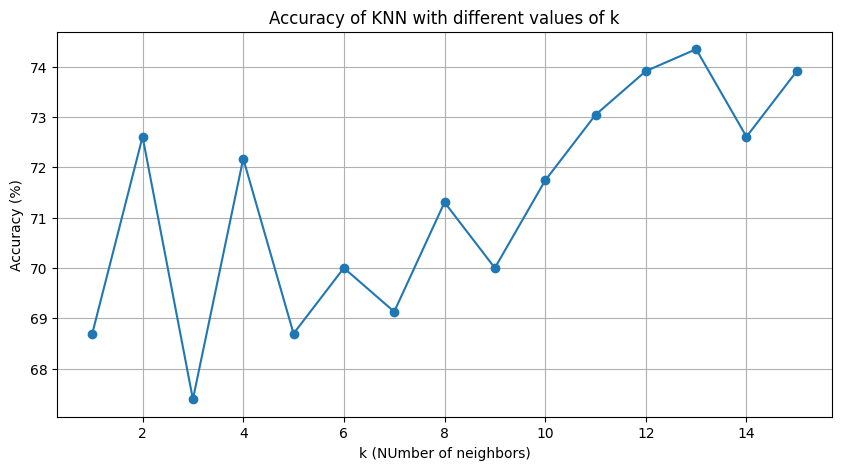

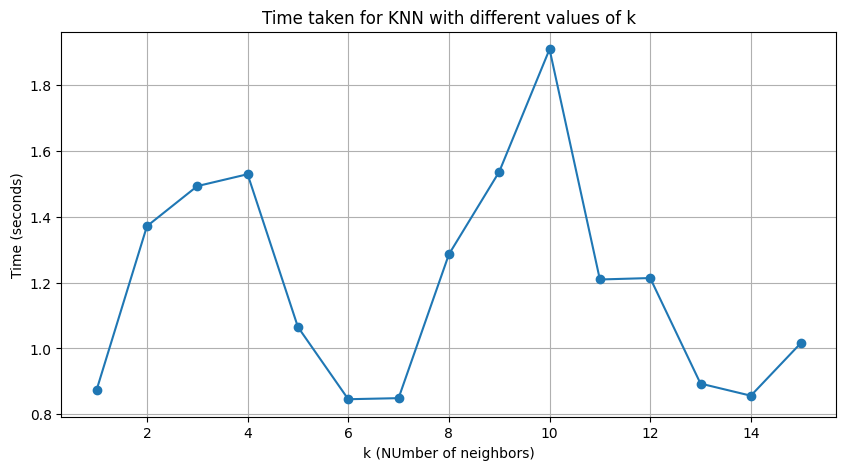

In [ ]:
#Visualize the results

# plot the accuracies
plt.figure(figsize=(10,5))
plt.plot(k_values, list(accuracies.values()), marker='o')
plt.xlabel('k (NUmber of neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of KNN with different values of k')
plt.grid(True)
plt.show()

# plot the time takes for each k
# plot the accuracies
plt.figure(figsize=(10,5))
plt.plot(k_values, list(times.values()), marker='o')
plt.xlabel('k (NUmber of neighbors)')
plt.ylabel('Time (seconds)')
plt.title('Time taken for KNN with different values of k')
plt.grid(True)
plt.show()

#Analyze and discuss how k affects the accuracy and computational cost

Smaller values of k (e.g.,1) can lead to higher variance and lower accuracy due to overfitting, but they are computationally lessexpensive.

Moderate values of k typicaly provide the best balance between accuracy and computational efficiency.

Larger values of k (e.g.,15 or more) reduce variance but can lead to underfitting and higher computational costs.

Therefore, when choosing the value of k, it is crucial to consider both the accuracy of the model and the compuattional cost based on the dataset size and available resources.




#Identify the optimal k based on your analysis.

The optimal k will be the value that (a)maximizes accuracy (while not too large that it causes underfitting), and (b)minimizes computational cost, ensuring that runtime is reasonable given the dataset size.

From the experiment, the optimal value of k is located in the middle range of the test (e.g., k = 3,5,7,9).